In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,#1 Serial Killer,2013
1,#211,2018
2,#5,2013
3,#50Fathers,2015
4,#66,2015


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
# What are the ten most common movie names of all time?

titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
The Outsider            12
Maya                    12
Freedom                 11
The Three Musketeers    11
Othello                 11
Honeymoon               11
Name: title, dtype: int64

In [6]:
# Which three years of the 1930s saw the most films released?

t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1357
1938    1343
1936    1306
Name: year, dtype: int64

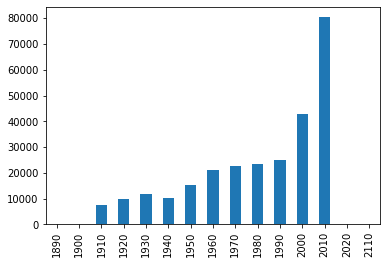

In [7]:
# Plot the number of films that have been released each decade
# over the history of cinema.

t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar');

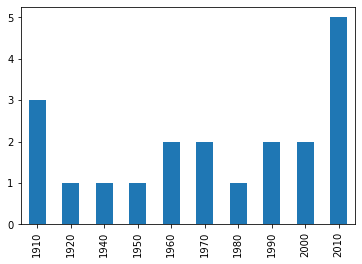

In [8]:
# Plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

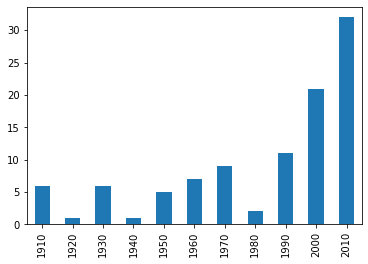

In [9]:
# Plot the number of "Hamlet" characters each decade.

c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar');

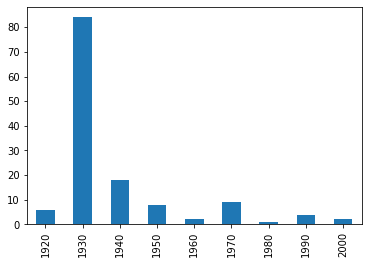

In [10]:
# Plot the number of "Rustler" characters
# in each decade of the history of film.

c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar');

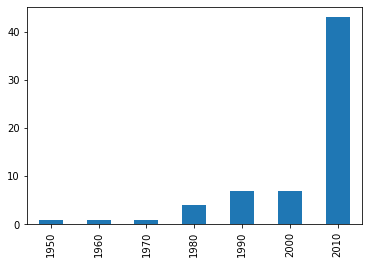

In [11]:
# Plot the number of "Hacker" characters
# in each decade of the history of film.

c = cast
c = c[c.character == 'Hacker']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar');

In [12]:
# What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself        22458
Dancer         12824
Extra          12211
Reporter        8614
Doctor          8279
Student         8108
Policeman       7525
Nurse           7343
Party Guest     7309
Herself         7269
Bartender       6934
Name: character, dtype: int64

In [13]:
# Who are the 10 people most often credited as "Herself" in film history?

c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II        13
Joyce Brothers             9
Luisa Horga                9
María Luisa (V) Martín     9
Hillary Clinton            8
Margaret Thatcher          8
Joan Rivers                7
Inés J. Southern           6
Rekha                      6
Sumie Sakai                6
Name: name, dtype: int64

In [14]:
# Who are the 10 people most often credited as "Himself" in film history?

c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             111
Richard Nixon             45
Ronald Reagan             42
John F. Kennedy           39
Winston Churchill         27
George W. Bush            26
Martin Luther King        25
Franklin D. Roosevelt     23
Ron Jeremy                22
Bill Clinton              22
Name: name, dtype: int64

In [15]:
# Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    33
Bess Flowers       29
Harold Miller      29
Frank O'Connor     27
Franklyn Farnum    27
Nolan Leary        27
Larry Steers       25
Herman Hack        25
Tom London         24
Name: name, dtype: int64

In [16]:
# Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Shakti Kapoor    22
Mammootty        22
Sukumari         20
Lou Scheimer     15
Mohanlal         15
Raj Babbar       15
Aruna Irani      15
Asrani           13
Rajesh Khanna    13
Om Shivpuri      13
Name: name, dtype: int64

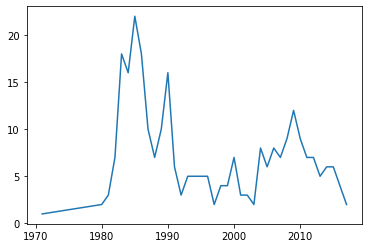

In [17]:
# Plot how many roles Mammootty has played in each year of his career.

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot();

In [18]:
# What are the 10 most frequent roles that start with the phrase "Patron in"?

c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Audience               2
Name: character, dtype: int64

In [19]:
# What are the 10 most frequent roles that start with the word "Science"?

c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science Promo Cadet      5
Science Club Member      5
Science                  4
Name: character, dtype: int64

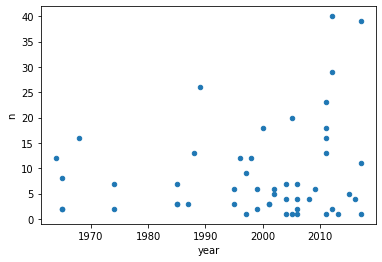

In [20]:
# Plot the n-values of the roles that Judi Dench has played over her career.

c = cast
c = c[c.name == 'Judi Dench'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter');

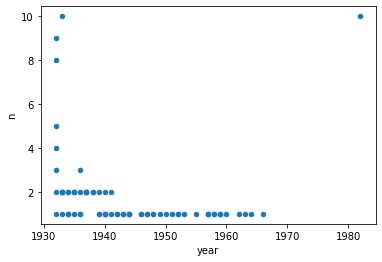

In [21]:
# Plot the n-values of Cary Grant's roles through his career.

c = cast
c = c[c.name == 'Cary Grant'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter');

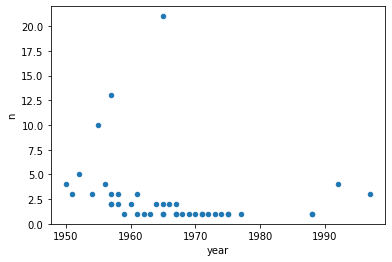

In [22]:
# Plot the n-value of the roles that Sidney Poitier has acted
# over the years.

c = cast
c = c[c.name == 'Sidney Poitier'].sort_values('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter');

In [23]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      7800
actress    3724
Name: type, dtype: int64

In [24]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actor      5532
actress    5438
Name: type, dtype: int64